# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "menaahmed"
kaggle_key = "50bfab18366410aaad8664aed86e31aa"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 560kB/s]
100% 189k/189k [00:00<00:00, 559kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
# # We are prediting count, so it is the label we are setting.
# train["target"]= train["count"]
# train["target"]

In [12]:
# Ignore casual and registered columns as they are also not present in the test dataset.
train.drop(['casual','registered'],axis =1, inplace=True)

In [13]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [14]:
predictor = TabularPredictor(
        label= "count" ,
        eval_metric="root_mean_squared_error",
        verbosity=0,
    ).fit(
        train_data=train, 
        time_limit=600, 
        presets="best_quality")

/usr/local/lib/python3.8/dist-packages/autogluon/features/generators/datetime.py:59: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  good_rows = series[~series.isin(bad_rows)].astype(np.int64)


### Review AutoGluon's training run with ranking of models that did the best.

In [15]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.017555      18.594190  545.132358                0.001056           0.279115            3       True         14
1   RandomForestMSE_BAG_L2  -53.311438      14.803174  402.670968                0.712002          30.308456            2       True         12
2          LightGBM_BAG_L2  -55.025041      14.512178  404.213532                0.421005          31.851020            2       True         11
3          CatBoost_BAG_L2  -55.739083      14.160653  427.283679                0.069480          54.921167            2       True         13
4        LightGBMXT_BAG_L2  -60.333236      17.390646  427.772600                3.299473          55.410088            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.043674    0.037133         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

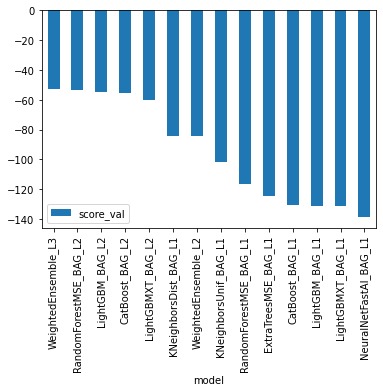

In [47]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [16]:
predictions = predictor.predict(test)
predictions.head()

0    23.230988
1    41.154751
2    45.379898
3    49.310047
4    51.525494
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [17]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.691322
std        89.893517
min         2.915603
25%        19.646151
50%        64.148796
75%       167.339508
max       366.763947
Name: count, dtype: float64

In [18]:
# How many negative values do we have?
print (sum (n< 0 for n in predictions.values))

0


In [19]:
# Set them to zero
#no negative values 

In [20]:
print (type(predictions))
new_predictions=predictions.to_frame

<class 'pandas.core.series.Series'>


In [21]:
print (type(predictions))


<class 'pandas.core.series.Series'>


### Set predictions to submission dataframe, save, and submit

In [22]:
submission["count"] = predictions
submission['count'] = submission['count'].apply(lambda x: round(x))

submission.to_csv("submission.csv", index=False)

In [23]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 148k/148k [00:02<00:00, 56.1kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [24]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2022-12-14 23:07:56  first raw submission  complete  1.79828      1.79828       
submission_new_features.csv  2022-12-14 04:29:40  new features          complete  0.53867      0.53867       
submission_new_features.csv  2022-12-14 04:28:25  new features          complete  0.53865      0.53865       
submission_new_features.csv  2022-12-14 04:25:42  new features          complete  0.53865      0.53865       


#### Initial score of `1.79055       `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f832d0acf40>,
      dtype=object)

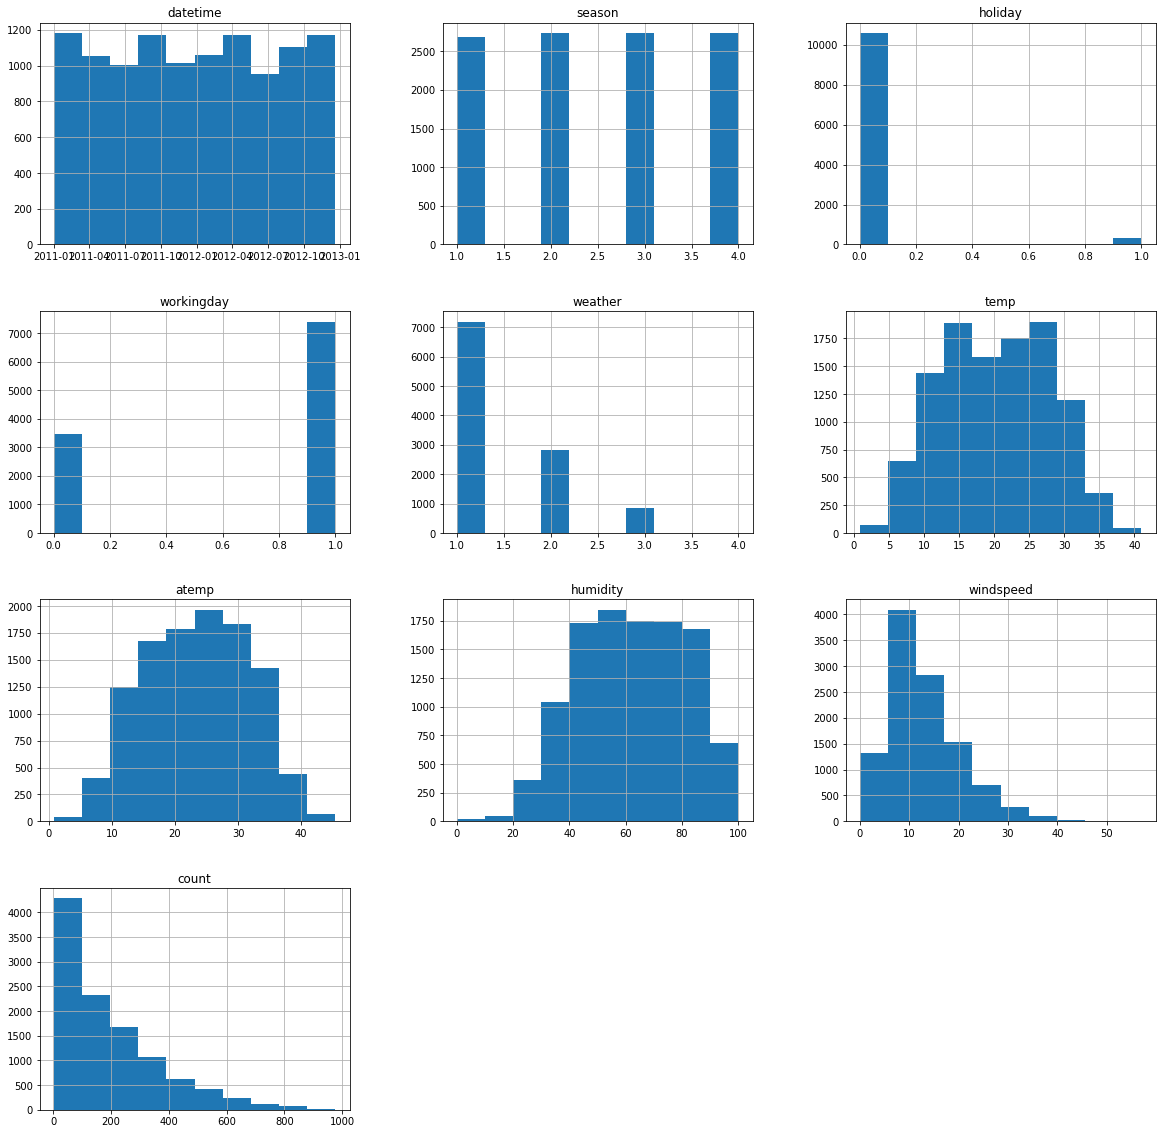

In [25]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=[20,20])

In [26]:
# create a new feature
# will create new features for hour ,day and month 
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month



In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f834c6cfd00>,
      dtype=object)

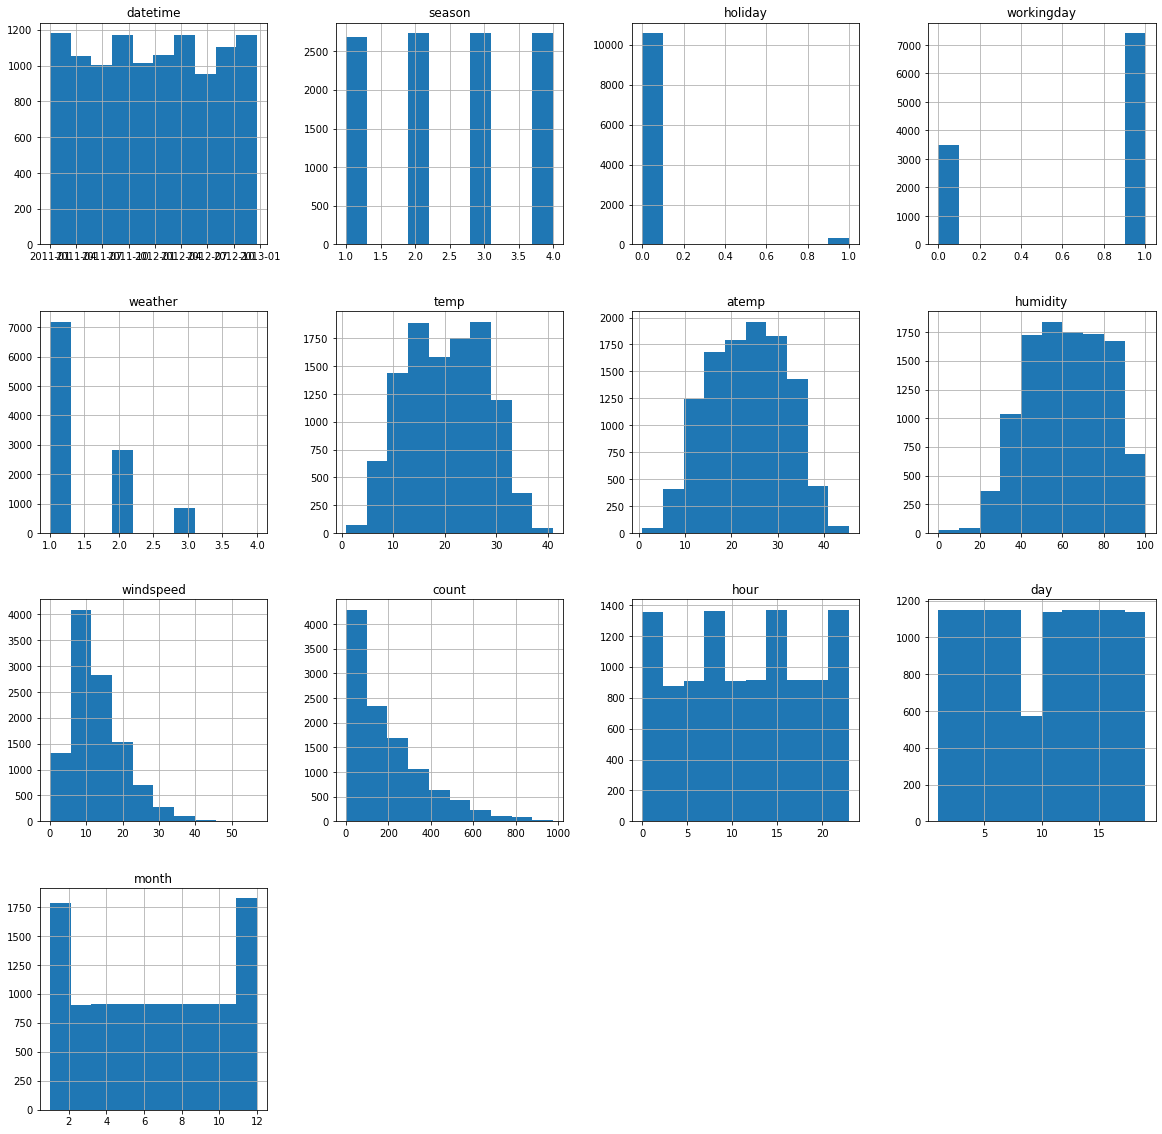

In [28]:
train.hist(figsize=[20,20])

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [29]:
train["season"] = train["season"].astype('category',copy=False)
train["weather"] = train["weather"].astype('category',copy=False)
test["season"] = test["season"].astype('category',copy=False)
test["weather"] = test["weather"].astype('category',copy=False)

In [30]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  hour        10886 non-null  int64         
 11  day         10886 non-null  int64         
 12  month       10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(7)
memory usage: 957.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f834a787c40>,
      dtype=object)

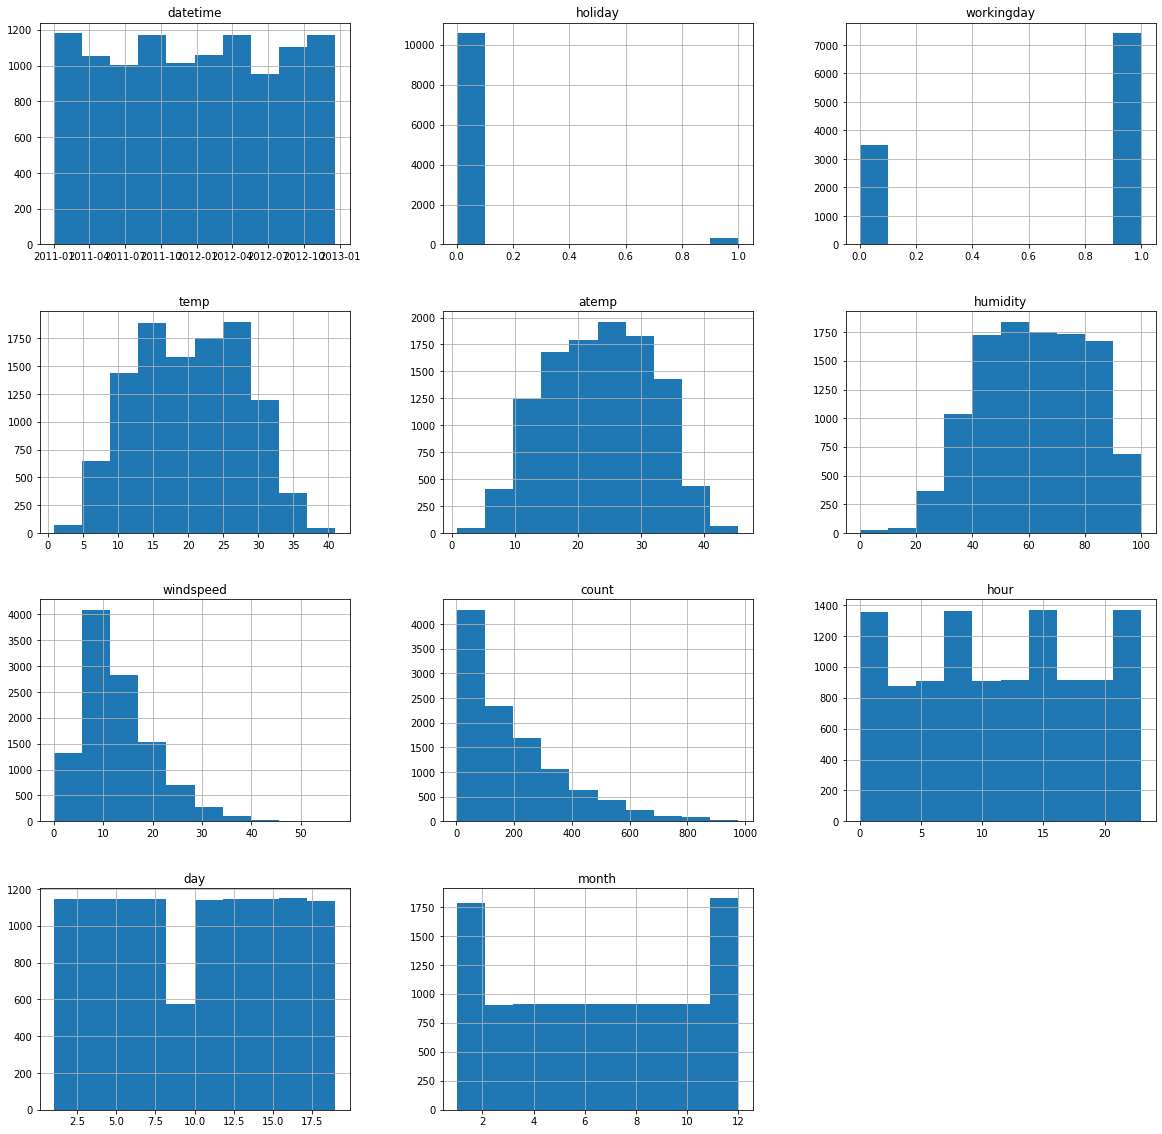

In [32]:
# View histogram of all features again now with the hour feature
train.hist(figsize=[20,20])

## Step 5: Rerun the model with the same settings as before, just with more features

In [33]:
#remove column datetime from train and test dataframes
train.drop(['datetime'],axis =1, inplace=True)
test.drop(['datetime'],axis =1, inplace=True)


In [34]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


In [35]:
predictor_new_features = TabularPredictor(label= "count" ,
        eval_metric="root_mean_squared_error",
        verbosity=0,
    ).fit(
        train_data=train, 
        time_limit=600, 
        presets="best_quality")

2022-12-14 23:14:56,219	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


In [36]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -49.950399      57.773698  478.093322                0.000855           0.380128            3       True         15
1          CatBoost_BAG_L2  -50.243804      56.304629  434.778365                0.113052          65.592244            2       True         12
2     ExtraTreesMSE_BAG_L2  -50.526423      56.905760  377.422328                0.714182           8.236207            2       True         13
3   RandomForestMSE_BAG_L2  -50.824063      56.945609  403.884743                0.754032          34.698622            2       True         11
4          LightGBM_BAG_L2  -50.888012      56.354804  392.056926                0.163226          22.870806            2       True         10
5      WeightedEnsemble_L2  -51.388240      54.931487  364.392131         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDist_BAG_L1': -119.36560130583281,
  'LightGBMXT_BAG_L1': -52.705795649247634,
  'LightGBM_BAG_L1': 

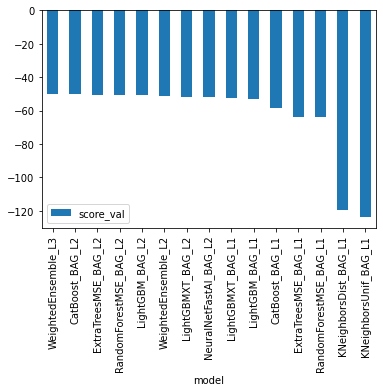

In [46]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [37]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    28.914764
1     6.532059
2     5.974627
3     3.787414
4     3.471406
Name: count, dtype: float32

In [38]:
predictions_new_features.describe()

count    6493.000000
mean      188.611237
std       164.941238
min         2.391677
25%        48.395020
50%       151.912735
75%       275.424927
max       811.850098
Name: count, dtype: float64

In [39]:
# How many negative values do we have?
print (sum (n< 0 for n in predictions_new_features.values))

0


In [54]:
# Remember to set all negative values to zero
predictions_new_features = predictions_new_features.clip(lower=0)


In [41]:
submission_new_features = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [42]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features['count'] = submission_new_features['count'].apply(lambda x: round(x))

submission_new_features.to_csv("submission_new_features.csv", index=False)

In [43]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 149k/149k [00:02<00:00, 59.0kB/s]
Successfully submitted to Bike Sharing Demand

In [44]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-12-14 23:20:31  new features          complete  0.53982      0.53982       
submission.csv               2022-12-14 23:07:56  first raw submission  complete  1.79828      1.79828       
submission_new_features.csv  2022-12-14 04:29:40  new features          complete  0.53867      0.53867       
submission_new_features.csv  2022-12-14 04:28:25  new features          complete  0.53865      0.53865       


#### New Score of `0.53865      `

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [51]:
import autogluon.core as ag

gbm_options = {
    'num_boost_round': 200,
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
    'objective':'huber',
    'num_iterations':300
}
hyperparameter = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN': {},
                   'KNN':{'n_neighbors':4,'weights':'distance','algorithm':'brute'},
                   'XGB': {'objective':'reg:pseudohubererror','eval_metric' :'rmse' }, 
                   'RF': {'n_estimators':200,'criterion':['gini','entropy','log_loss']}
                   }
          
predictor_new_hpo =TabularPredictor(label= "count" ,
        eval_metric="root_mean_squared_error",
        verbosity=0,
    ).fit(
        train_data=train, 
        time_limit=600, 
        presets="best_quality",
        hyperparameters=hyperparameter)

		ray::_ray_fit() (pid=4207, ip=172.28.0.12)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 374, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold,
  File "/usr/local/lib/python3.8/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 696, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/autogluon/tabular/models/lgb/lgb_model.py", line 186, in _fit
    self.model = lgb.train(**train_params)
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py", line 2605, in __init__
    train_set.construct()
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py", line 1815, in construct
    self._lazy_init(self.data, label=self.label,
  File "/usr/local/lib/python3.8/dist-packages/lightgbm

In [52]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -57.706685      64.470293  245.106840                0.004731           0.292662            2       True          3
1       XGBoost_BAG_L1  -57.712881      56.786117  244.805130               56.786117         244.805130            1       True          2
2       XGBoost_BAG_L2  -58.031606      64.839847  271.880131                0.374285          27.065953            2       True          4
3    KNeighbors_BAG_L1 -120.302490       7.679446    0.009048                7.679446           0.009048            1       True          1
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_XGBoost', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Proc

{'model_types': {'KNeighbors_BAG_L1': 'StackerEnsembleModel_KNN',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost'},
 'model_performance': {'KNeighbors_BAG_L1': -120.30248957252593,
  'XGBoost_BAG_L1': -57.71288104408659,
  'WeightedEnsemble_L2': -57.7066850315277,
  'XGBoost_BAG_L2': -58.03160560032476},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighbors_BAG_L1': 'AutogluonModels/ag-20221214_233839/models/KNeighbors_BAG_L1/',
  'XGBoost_BAG_L1': 'AutogluonModels/ag-20221214_233839/models/XGBoost_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20221214_233839/models/WeightedEnsemble_L2/',
  'XGBoost_BAG_L2': 'AutogluonModels/ag-20221214_233839/models/XGBoost_BAG_L2/'},
 'model_fit_times': {'KNeighbors_BAG_L1': 0.009047508239746094,
  'XGBoost_BAG_L1': 244.80513048171997,
  'WeightedEnsemble_L2': 0.2926616668701172,
  'XGBoost_BAG_L2': 27.06595253944397},
 'mode

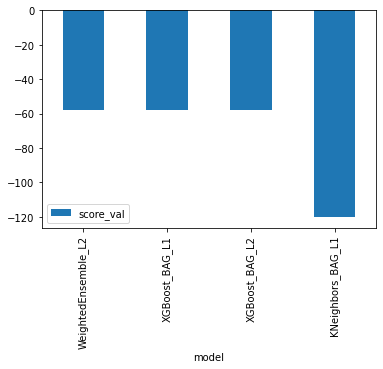

In [53]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [72]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    12.042970
1     1.150339
2     0.959380
3    -6.769422
4    -5.939730
Name: count, dtype: float32

In [73]:
# Remember to set all negative values to zero
predictions_new_hpo = predictions_new_hpo.clip(lower=0)


In [74]:
# make sure all predictions are not negative 
predictions_new_hpo.describe()


count    6493.000000
mean      189.668259
std       167.070877
min         0.000000
25%        46.775814
50%       151.771591
75%       284.893860
max       902.170105
Name: count, dtype: float64

In [75]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [76]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo['count'] = submission_new_hpo['count'].apply(lambda x: round(x))

submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [77]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 149k/149k [00:02<00:00, 58.8kB/s]
Successfully submitted to Bike Sharing Demand

In [78]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-12-15 00:01:52  new features with hyperparameters  complete  0.71142      0.71142       
submission_new_hpo.csv       2022-12-14 23:57:13  new features with hyperparameters  error                                
submission_new_hpo.csv       2022-12-14 23:56:43  new features with hyperparameters  error                                
submission_new_hpo.csv       2022-12-14 23:54:51  new features with hyperparameters  complete  0.53982      0.53982       


#### New Score of `0.71142            `

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

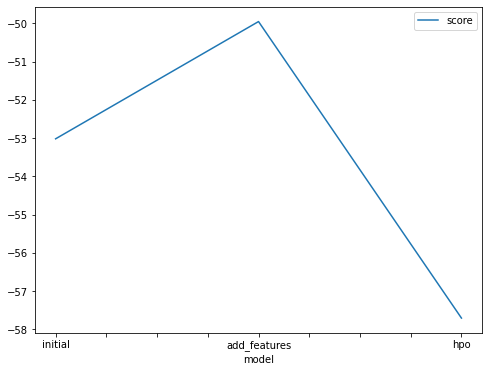

In [79]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [ -53.017555 , -49.950399 , -57.706685]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

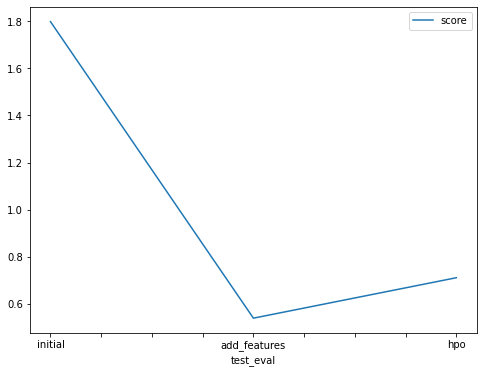

In [80]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79828      , 0.53982      , 0.71142      ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [81]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "'GBM':{ 'num_boost_round': 200, 'num_leaves': ag.space.Int(lower=26, upper=66, default=36), 'objective':'huber','num_iterations':300}"],
    "hpo2": ["default", "default", "'RF':{'n_estimators':200,'criterion':['gini','entropy','log_loss']}"],
    "hpo3": ["default", "default", "'KNN': {'n_neighbors':4,'weights':'distance','algorithm':'brute'}"],
    "hpo4": ["default", "default", "'XGB': {'objective':'reg:pseudohubererror','eval_metric' :'rmse' }"],
    "score": [1.79828      , 0.53982      , 0.71142      ]
})

,model,hpo1,hpo2,hpo3,hpo4,score
0,initial,default,default,default,default,1.79828
1,add_features,default,default,default,default,0.53982
2,hpo,"'GBM':{ 'num_boost_round': 200, 'num_leaves': ag.space.Int(lower=26, upper=66, default=36), 'objective':'huber','num_iterations':300}","'RF':{'n_estimators':200,'criterion':['gini','entropy','log_loss']}","'KNN': {'n_neighbors':4,'weights':'distance','algorithm':'brute'}","'XGB': {'objective':'reg:pseudohubererror','eval_metric' :'rmse' }",0.71142
